In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [4]:
data_features = data.drop('quality',axis=1)
data_target = data['quality']

x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.3, random_state=RANDOM_STATE)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
# DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_classifier.fit(x_train, y_train)
tree_y_pred = tree_classifier.predict(x_test)

acc_tree =cross_val_score(tree_classifier, x_train, y_train, cv=5, scoring='accuracy')
acc_DT = acc_tree.mean()
print('acc_DT:' ,round(acc_DT, 2))

# BaggingClassifier

bag_classifier = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)
bag_classifier.fit(x_train, y_train)
bag_y_pred = bag_classifier.predict(x_test)

acc_bag =cross_val_score(bag_classifier, x_train, y_train, cv=5, scoring='accuracy')
acc_Bagging = acc_bag.mean()
print('acc_Bagging:' ,round(acc_Bagging, 2))

# RandomForestClassifier

Random_f = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
Random_f.fit(x_train, y_train)
rf_y_pred = Random_f.predict(x_test)

acc_rf_1 =cross_val_score(Random_f, x_train, y_train, cv=5, scoring='accuracy')
acc_RF = acc_rf_1.mean()
print('acc_RF:' ,round(acc_RF, 2))

# acc_DT = 0
# acc_Bagging = 0
# acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

acc_DT: 0.59
acc_Bagging: 0.67
acc_RF: 0.68


- Лушие результаты показывают классификаторы, которые можно настраивать - BaggingClassifier и RandomForestClassifier
- Самым лучшим классификатором является RandomForestClassifier с 100 деревьями.

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [6]:
%%time
list1 = [10, 50, 100]
list2 = [x for x in range(200, 5400, 200)]
list_forest = list1 + list2

list_scores =[]
for i in tqdm(list_forest):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    list_scores.append(accuracy_score(y_test, y_pred))

  0%|          | 0/29 [00:00<?, ?it/s]

CPU times: total: 12min 40s
Wall time: 13min 32s


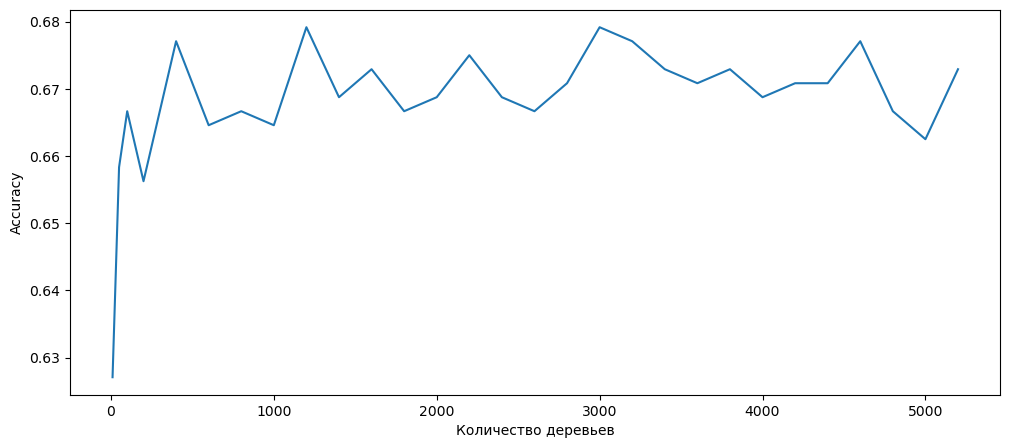

In [7]:
rcParams['figure.figsize'] = 12,5
plt.plot(list_forest, list_scores)
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [8]:
# GradientBoostingClassifier / sklearn

GBC = GradientBoostingClassifier(random_state=RANDOM_STATE).fit(x_train, y_train)
y_pred_gbc = GBC.predict(x_test)

acc_GBC = cross_val_score(GBC, x_train, y_train, cv=5, scoring='accuracy')
acc_sklearn = acc_GBC.mean()
print('acc_sklearn:' ,round(acc_sklearn, 2))

# xgboost
le = LabelEncoder()
y_train = le.fit_transform(y_train)

XGB_model = XGBClassifier(random_state=RANDOM_STATE).fit(x_train, y_train)
y_pred_xgb = XGB_model.predict(x_test)

acc_XGB = cross_val_score(XGB_model, x_train, y_train, cv=5, scoring='accuracy')
acc_xgboost = acc_XGB.mean()
print('acc_xgboost:' ,round(acc_xgboost, 2))

#acc_sklearn = 0
#acc_xgboost = 0
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

acc_sklearn: 0.64
acc_xgboost: 0.65


Вывод: результаты схожи, различаются незначительно

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:


### Ваш код ###

best_params_sklearn = {}
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = 0
acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:


### Ваш код ###

acc_lightgbm = 0
acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:


### Ваш код ###

best_params_lightgbm = {}
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = {}
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = 0
acc_catboost_cv = 0
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:


### Ваш код ###

best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = 0
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:


### Ваш код ###

acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:


### Ваш код ###

acc_stacking = 0
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results